## News analysis

* Install new conda packages
* Reading a RSS feed
* Working with `list` and `dict`
* Loops
* Creating a wordle
* Writing files

In [100]:
## make sure the images appear inline

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Install the packages `feedparser` and `wordloud`

* You can install a package with `conda install` 
* These are not in the default channel, but in the `conda-forge` channel
* Use `conda install -c conda-forge wordcloud`

In [101]:
import feedparser
import wordcloud

In [102]:
import feedparser

url = 'http://feeds.nos.nl/nosnieuwseconomie'
feed = feedparser.parse(url)

## Exercise

* Figure out how to access the articles in the `feed` variable
* Store all texts in each article, 20 of them, in a list
* Concatenate all of these texts into one big text, using the function `join`

In [103]:
txts = ['bla', 'die', 'bla']

' '.join(txts)

'bla die bla'

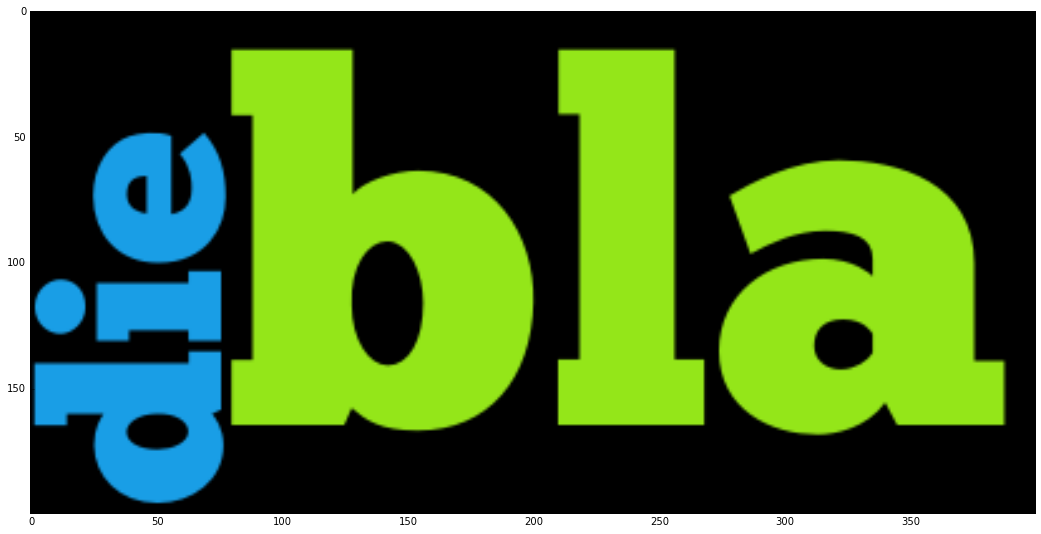

In [104]:
## You can create a wordcloud with the following code

from wordcloud import WordCloud

txt = ' '.join(txts)

wc = WordCloud(
    font_path='./resources/Chunkfive.otf',
).generate(txt)

plt.figure(figsize=(18, 14))
plt.imshow(wc)

## Stopwords

* Great, but not great enough
* Remove the common words from the text to create a better wordcloud

In [105]:
## Get a list of the words, lowercase and strip them from whitespaces

words = "Get a list of the \n\nwords, lowercase and strip them from\n\n\n whitespaces"

print(words)

Get a list of the 

words, lowercase and strip them from


 whitespaces


In [106]:
## Use split to remove all whitespaces and get a list of words

words.split()

['Get',
 'a',
 'list',
 'of',
 'the',
 'words,',
 'lowercase',
 'and',
 'strip',
 'them',
 'from',
 'whitespaces']

In [107]:
## use lower to lowercase words

word = "Get"

word.lower()

'get'

## Exercise: write a function that returns a list of lists of words that are lowercase

In [108]:
def get_lowercase_words(text):
    pass

test = "first Text second TEXT"
result = get_lowercase_words(test)

print(result)

assert result == ["first", "text", "second", "text"]

None


AssertionError: 

## Exercise: write a function that returns a list of the most common words

* Given a list of list of words, return all words that are common in many documents

In [ ]:
## You can use collections.Counter()

from collections import Counter

l = list('a bunch of letters! if you put list() around them you get a list of characters, so then you can count them.')

Counter(l).most_common(6)

In [ ]:
def get_common_words(texts, n=2):
    pass
        
test = ["first Text and and and the text", "second TEXT and and, the text"]
result = get_common_words(test, n=2)

print(result)

assert result == ["and", "the"]

## Exercise: Write a function that filters all texts

In [ ]:
remove_words = ["and", "the", "is"]
test = "And there is that, the news."

def filter_text(text, remove_words):

    words = text.split()
    pass

result = filter_text(test, remove_words)
print(result)

assert result == "there is that, news"

## Exercise: Writing files

In [ ]:
## You can save a file with `plt.savefig`

wc = WordCloud(
    font_path='./resources/Chunkfive.otf',
).generate("test wordcloud")

plt.figure()
plt.imshow(wc)
plt.savefig('./resources/wordclouds/test.png')

In [ ]:
## Write a function that creates a wordcloud from text and saves it in the right location

def save_wordcloud(text, filename):
    pass

save_wordcloud("test 2 wordcloud", "./resources/wordclouds/test_2.png")

## All together: Automation

* Create a loop over the articles, create a wordcloud and save it
* We have to come up with a filename in the loop

In [ ]:
all_texts = [entry["summary"] for entry in feed["entries"]]

remove_words = get_common_words(all_texts)

for i, entry in enumerate(feed["entries"]):
    
    filtered = filter_text(entry["summary"], remove_words)
    filename = "./resources/wordclouds/test_%s.png" % i
    
    save_wordcloud(filtered, filename)

## Solutions

In [109]:
import feedparser

url = 'http://feeds.nos.nl/nosnieuwseconomie'
feed = feedparser.parse(url)

txts = [f['summary'] for f in feed['entries']]

In [110]:
## create a list of lowercased words

def get_lowercase_words(text):
    return text.lower().split()

test = "first Text second TEXT"
result = get_lowercase_words(test)

print(result)

assert result == ["first", "text", "second", "text"]

['first', 'text', 'second', 'text']


In [114]:
## Find the most common words, that appear in at least n documents

def get_common_words(texts, n=2):
    
    words = list()
    
    for text in texts:
        uniques = list(set(get_lowercase_words(text)))
        words += uniques
    
    counts = Counter(words)
    
    common = counts.most_common(n)
    
    return [w for w, count in common]
    
        
test = ["first Text and and and the text", "second TEXT and and, the text"]
result = get_common_words(test, n=2)

print(result)

assert result == ["and", "the"]

['and', 'the']


In [112]:
## A function that filters words

remove_words = ["and", "the", "is"]
test = "And there is that, the news."

def filter_text(text, remove_words):

    words = text.lower().split()    
    return ' '.join([w for w in words if not w in remove_words])

result = filter_text(test, remove_words)
print(result)

assert result == "there that, news."

there that, news.


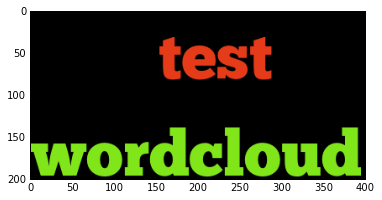

In [113]:
## Write a function that creates a wordcloud from text and saves it in the right location

def save_wordcloud(text, filename):
    
    wc = WordCloud(
        font_path="./resources/Chunkfive.otf"
    ).generate(text)
    
    plt.figure()
    plt.imshow(wc)
    plt.savefig(filename)

save_wordcloud("test 2 wordcloud", "./resources/wordclouds/test_2.png")

In [ ]:
## Automate with a loop

all_texts = [entry["summary"] for entry in feed["entries"]]
remove_words = get_common_words(all_texts)

for i, entry in enumerate(feed["entries"]):
    
    filtered = filter_text(entry["summary"], remove_words)
    filename = "./resources/wordclouds/test_%s.png" % i
    
    save_wordcloud(filtered, filename)